# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

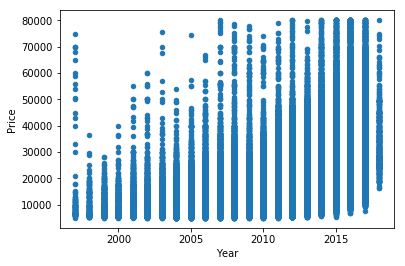

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

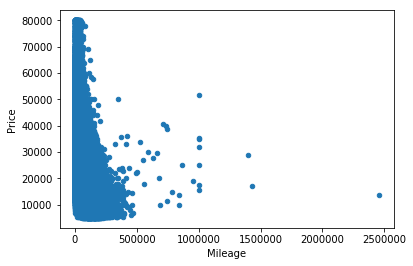

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
#Para todas dumies
#Los mejores parámetros son:
#rf = RandomForestRegressor(n_estimators=450, max_features=26, max_depth=90,  random_state=1, n_jobs=-1)
#rf.fit(X_train, Y_train)
#data2 = pd.get_dummies(data)

In [4]:
import category_encoders as ce
BinEncoder = ce.BinaryEncoder().fit(data)
data2 = X_ = BinEncoder.transform(data)
data2.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6,Make_0,Make_1,Make_2,...,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,Price,Year,Mileage
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,21490,2014,31909
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,21250,2016,25741
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,1,20925,2016,24633
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,14500,2012,84026
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,32488,2013,22816


In [5]:
#Muestreo para entrenamiento
print(data2.shape)
#data_sample = data.sample(n=50000, weights='Model', random_state=1)
data_sample = data2.sample(n=25000, random_state=1)

Y = data_sample.Price
X = data_sample.drop(['Price'], axis=1)
#data_sample

(500000, 28)


In [6]:
# Hacer el split de los datos: entrenamiento y prueba
size = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=size).copy()


# Finding max parameters

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define number of splits and seed
kfold = KFold(n_splits=5, random_state=1)

### Finding max estimators

Text(0, 0.5, 'NEG_RMSE')

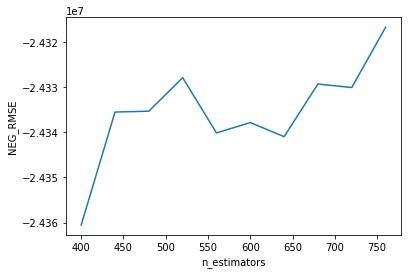

In [20]:
#list of values to try for n_estimators
estimator_range = range(400, 800, 40)
RMSE_scores_estim = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rf  = RandomForestRegressor (n_estimators=estimator,random_state=1, n_jobs=-1)
    RMSE_scores_estim.append(cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(estimator_range, RMSE_scores_estim)
plt.xlabel('n_estimators')
plt.ylabel('NEG_RMSE')

### Finding max depth

Text(0, 0.5, 'RMSE')

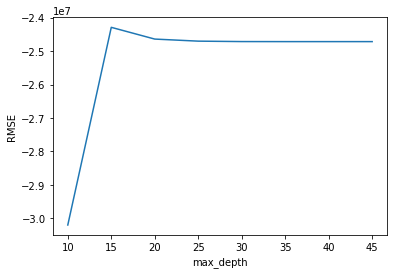

In [13]:
#list of values to try for n_estimators
max_depth_range = range(10, 50, 5)

RMSE_scores_depth = []
# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in max_depth_range:
    rf  = RandomForestRegressor (n_estimators=400, max_depth=depth, random_state=1, n_jobs=-1)
    RMSE_scores_depth.append(cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean())

plt.plot(max_depth_range, RMSE_scores_depth)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

### Finding max features

Text(0, 0.5, 'NEG_RMSE')

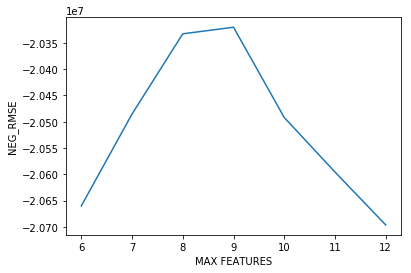

In [8]:
# list of values to try for max_features
feature_range = range(6, 13, 1)

RMSE_scores_featu = []
# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rf  = RandomForestRegressor(n_estimators=500, max_features=feature, max_depth=15, random_state=1, n_jobs=-1)
    RMSE_scores_featu.append(cross_val_score(rf, X, Y, cv=5, scoring='neg_mean_squared_error').mean())

plt.plot(feature_range, RMSE_scores_featu)
plt.xlabel('MAX FEATURES')
plt.ylabel('NEG_RMSE')

# Train the model

In [10]:
Y = data2.Price
X = data2.drop(['Price'], axis=1)

#Train the model selecting the best found parameters
size = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=size).copy()
print (len(X_train))
X_train.head()

350000


,State_0,State_1,State_2,State_3,State_4,State_5,State_6,Make_0,Make_1,Make_2,...,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,Year,Mileage
339254,0,0,0,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,0,2016,38390
313266,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,2017,8043
416105,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1,1,2016,30306
484007,0,0,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,1,1,2008,84878
166077,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,2007,109464


In [11]:
#3698.264395413818
#rf = RandomForestRegressor(n_estimators=250, max_features=5, max_depth=14, random_state=1, n_jobs=-1)
#RMSE: 3568.311082870556
#rf = RandomForestRegressor(n_estimators=250, max_features=5, max_depth=17, random_state=1, n_jobs=-1)
rf = RandomForestRegressor(n_estimators=750, max_depth=15, max_features=9, random_state=1, n_jobs=-1)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=750, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [12]:
y_pred_train = rf.predict(X_validation)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred_train)))

RMSE: 3556.6669941053897


# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


# Entrenar con todos los datos
Esto es para que el modelo haga la predicción de la base de datos de test de keagle con el modelo entrenado

In [13]:
rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=750, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [14]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [15]:
data_test.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2015,23388,OH,Ford,EscapeFWD
1,2014,45061,PA,Ford,EscapeSE
2,2007,101033,WI,Toyota,Camry4dr
3,2015,13590,HI,Jeep,Wrangler
4,2009,118916,CO,Dodge,Charger4dr


In [16]:
from sklearn.externals import joblib

In [17]:
joblib.dump(rf, 'modelcars.pkl', compress=3)

['modelcars.pkl']

### Preparar los datos de test

In [ ]:
#Unir con maestro de modelos
data_test['Make']=data_test['Make'].replace('Saturn','Chevrolet')
data_test1 = pd.merge(data_test, masterMoldel, how='left', on=['Model','Make'])
print(len(data_test1))

#Separar y codificar datos
data_test1['State_Enco'] = leState.transform(data_test1.State)

data_test1['Year2'] = (2018 - data['Year'])

#Borrar y renombrar
data_test1.drop(columns=['Model','Make','State','Year'], inplace=True)
data_test1.rename(columns={'index': 'Model_Enco',  }, inplace=True)

data_test1.head()

In [ ]:
data_test1['Model_Enco'].fillna(3, inplace=True)

In [ ]:
y_pred = pd.DataFrame(rf.predict(data_test1),index=data_test.index,columns=['Price'])

In [ ]:
y_pred.to_csv('test_submission.csv', index_label='ID')

In [ ]:
data_test['Make'].unique()

In [ ]:
data_test['Make']=data_test['Make'].replace('Saturn','Chevrolet')
data_test['Make'].unique()

In [ ]:
#data_test.pivot_table('Make', index='Make', columns='Year', aggfunc=['count'])

#data_test[['State','Model','Year']].groupby(['Model','State']).count().sort_values('Year', ascending=True)
#data_test[['Make','Model','Year']].groupby('Make','Model').agg({'count':count})
#count()#.sort_values('Year', ascending=False)
#data_all[data_all.Coincidencia<1].pivot_table('Coincidencia', index=['Undergrad'], columns='Undergrad_des', aggfunc=['mean','count'])


# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


In [46]:
#!/usr/bin/python
from flask import Flask
from flask_restplus import Api, Resource, fields
from sklearn.externals import joblib
from Model_PriceCars import predict_car_value

In [48]:
print(predict_car_value())

1


In [49]:
app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Estimador de precio vehicular',
    description='Ivan G.')

ns = api.namespace('Predict', 
     description='Predict price')
   
parser = api.parser()

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Car Maker', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='Car Model', 
    location='args')

parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='State', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=str, 
    required=True, 
    help='Mileage', 
    location='args')

parser.add_argument(
    'Year', 
    type=str, 
    required=True, 
    help='Year', 
    location='args')


resource_fields = api.model('Resource', {
    'result': fields.String,
})

@ns.route('/')
class PhishingApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
         "result": predict_car_value() #predict_proba(args['URL'])
        }, 200
    
    
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=8889)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:8889/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Mar/2019 22:21:03] "GET /Predict/?Make=11&Model=1&State=1&Mileage=1&Year=1 HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2019 22:21:09] "GET /Predict/?Make=11&Model=1&State=1&Mileage=1&Year=1 HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2019 22:21:09] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Mar/2019 22:21:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2019 22:21:48] "GET /swagger.json HTTP/1.1" 200 -


In [ ]:
data['Year2'] = (2018 - data['Year'])
Y = data.Price
X = data[['Mileage','Year2','Model','Make','State']]

#Codify data
leModel = preprocessing.LabelEncoder()
leMake = preprocessing.LabelEncoder()
leState = preprocessing.LabelEncoder()

leModel.fit(X.Model)
leMake.fit(X.Make)
leState.fit(X.State)

X['Model_Enco'] = leModel.transform(X.Model)
X['Make_Enco'] = leMake.transform(X.Make)
X['State_Enco'] = leState.transform(X.State)
X.drop(columns=['Model','Make','State'], inplace=True)
X.head()